In [160]:
import pandas as pd
from keras.models import Model, Input, load_model
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Lambda, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.utils import shuffle
import pickle
import cv2
import glob

In [161]:
# Add Data 1 to samples

In [162]:
path_data1 = "..\\Ai_a\\data_new\\"
df = pd.read_csv(path_data1 + "data.csv")

In [163]:
df.columns # to view header

Index(['Path', 'Label'], dtype='object')

In [164]:
samples=[]

In [165]:
for i in df.index:
    samples.append([df["Path"][i],df["Label"][i]])

In [166]:
len(samples)

15550

In [167]:
# Add Data 2 to samples

In [168]:
# Preview data
# plt.imshow(cv2.imread(samples[50000][0]))
# plt.show()

In [169]:
h = 32
w = 32
channel = 3
class_num = 5

In [170]:
# Setup model
input_img = Input(shape=(h,w,channel))

normal = Lambda(lambda x: x/127.5 -1)(input_img)
conv1 = Conv2D(32,(3,3), activation="relu")(normal)
max1 =
()(conv1)
out = Conv2D(64,(3,3), activation="relu")(max1)
out = MaxPool2D()(out)
#out = Conv2D(96,(3,3), activation="relu")(out)
out = Conv2D(128,(3,3), activation="relu")(out)
out = MaxPool2D()(out)
#out = Conv2D(256,(3,3), activation="relu")(out)
out = Flatten()(out)
#out = MaxPool2D()(out)
out = Dropout(0.5)(out)
#out = MaxPool2D()(out)
out = Dense(200, activation="relu")(out)
out = Dense(100, activation="relu")(out)
out = Dense(class_num, activation="softmax")(out)

model = Model(inputs=input_img, outputs = out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
lambda_10 (Lambda)           (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 128)         73856     
__________

In [171]:
def generator(samples, batch_size=32):
    num_sample = len(samples)
    while True:
        samples = shuffle(samples)
        for offset in range(0, num_sample, batch_size):
            batch_samples = samples[offset:batch_size+offset]
            
            images = []
            labels = []
            for batch  in batch_samples:
                values = np.zeros(class_num)
                img  = cv2.imread(batch[0])
                img = cv2.resize(img, (32,32))
                values[int(batch[1])] = 1
                
                   
                images.append(img)
                labels.append(values)
                
               
            X_train = np.array(images)
            y_train = np.array(labels)
            yield (X_train,y_train)

In [172]:
batch_size = 32
train_generator = generator(samples, batch_size=batch_size)

In [173]:
# Compile model
adam = optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])

In [174]:
# Train ...
model.fit_generator(train_generator, \
                    steps_per_epoch=len(samples)//batch_size, epochs=20)

Epoch 1/20
485/485 [==============================] - 38s 79ms/step - loss: 0.3678 - acc: 0.8573
Epoch 2/20
485/485 [==============================] - 35s 73ms/step - loss: 0.1096 - acc: 0.9609
Epoch 3/20
485/485 [==============================] - 36s 74ms/step - loss: 0.0791 - acc: 0.9746
Epoch 4/20
485/485 [==============================] - 35s 72ms/step - loss: 0.0526 - acc: 0.9820
Epoch 5/20
485/485 [==============================] - 36s 74ms/step - loss: 0.0505 - acc: 0.9839
Epoch 6/20
485/485 [==============================] - 35s 73ms/step - loss: 0.0441 - acc: 0.9851
Epoch 7/20
485/485 [==============================] - 36s 75ms/step - loss: 0.0365 - acc: 0.9867
Epoch 8/20
485/485 [==============================] - 37s 77ms/step - loss: 0.0338 - acc: 0.9878
Epoch 9/20
485/485 [==============================] - 37s 77ms/step - loss: 0.0415 - acc: 0.9858
Epoch 10/20
485/485 [==============================] - 36s 74ms/step - loss: 0.0361 - acc: 0.9871
Epoch 11/20
485/485 [========

In [175]:
# Repair data test
acc = 0
label_test = []
file_test = []
for f in glob.glob('../Ai_a/TestFinally/*'):
    # file
    img = cv2.imread(f)
    file_test.append(img)
    # label
    label = f
    label = label.split('\\')[-1] #/..3
    label = label.split('_')[0]
    y = np.zeros(5)
    y[int(label)] = 1
    label_test.append(y)
label_test = np.array(label_test)
file_test = np.array(file_test)
file_test.shape

(100, 32, 32, 3)

In [176]:
# Way1
model.evaluate(file_test, label_test)

100/100 [==============================] - 0s 5ms/step


[0.35658234238660952, 0.94999999999999996]

0 - 1
0 - 0 -> 1
0 - 0 -> 2
0 - 0 -> 3
0 - 0 -> 4
0 - 0 -> 5
0 - 0 -> 6
0 - 0 -> 7
0 - 0 -> 8
0 - 4
0 - 0 -> 9
0 - 1
0 - 0 -> 10
0 - 0 -> 11
0 - 0 -> 12
1 - 1 -> 13
1 - 1 -> 14
1 - 1 -> 15
1 - 1 -> 16
1 - 1 -> 17
1 - 1 -> 18
1 - 1 -> 19
1 - 4
1 - 1 -> 20
1 - 1 -> 21
1 - 1 -> 22
1 - 1 -> 23
1 - 1 -> 24
1 - 1 -> 25
1 - 1 -> 26
1 - 1 -> 27
1 - 1 -> 28
2 - 2 -> 29
2 - 2 -> 30
3 - 3 -> 31
3 - 3 -> 32
3 - 3 -> 33
3 - 3 -> 34
3 - 3 -> 35
3 - 3 -> 36
3 - 3 -> 37
3 - 3 -> 38
3 - 3 -> 39
3 - 3 -> 40
3 - 3 -> 41
3 - 3 -> 42
3 - 3 -> 43
3 - 3 -> 44
3 - 3 -> 45
3 - 3 -> 46
3 - 3 -> 47
4 - 4 -> 48
4 - 4 -> 49
4 - 4 -> 50
4 - 4 -> 51
4 - 4 -> 52
4 - 4 -> 53
4 - 4 -> 54
4 - 4 -> 55
4 - 4 -> 56
4 - 4 -> 57
4 - 4 -> 58
4 - 4 -> 59
4 - 4 -> 60
4 - 4 -> 61
4 - 4 -> 62
4 - 4 -> 63
4 - 4 -> 64
4 - 4 -> 65
4 - 4 -> 66
4 - 4 -> 67
4 - 4 -> 68
4 - 4 -> 69
4 - 4 -> 70
4 - 4 -> 71
4 - 4 -> 72
4 - 4 -> 73
4 - 4 -> 74
4 - 4 -> 75
4 - 4 -> 76
4 - 4 -> 77
4 - 1
4 - 4 -> 78
4 - 4 -> 79
4 - 4 -> 80
4 - 4 -> 81
4 - 4 -

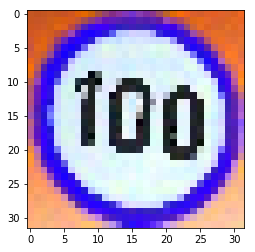

In [177]:
# Way2 View Detail
count = 0
for f in glob.glob('../Ai_a/TestFinally/*'):
    img = cv2.imread(f)
    pred = model.predict(img[None, ...])
    label = f
    label = label.split('\\')[-1]
    label = label.split('_')[0]
    if (np.argmax(pred) == int(label)):
        count += 1
        print(label + ' - ' + str(np.argmax(pred)) + ' -> ' + str(count))
    else:
        plt.imshow(img)
        print(label + ' - ' + str(np.argmax(pred)))

In [178]:
########## END ##########

In [179]:
model.save('Model/Train_ver5.h5')

In [180]:
model = load_model('../Ai_a/Model/Train_ver5.h5')